In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
import pandas as pd
from bokeh.layouts import row, widgetbox, layout, gridplot
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models.glyphs import MultiLine
from bokeh.io import output_notebook
from bokeh.models.widgets import Div
%matplotlib inline
output_notebook()

Loading BokehJS ...

## Create Fake Data
Let's start by generating a wee fake dataset.

In [2]:
num_data = 5
X = norm.rvs(size=(num_data,2), random_state=4)*2
X = np.dot(X, np.linalg.cholesky([[1, 0.8], [0.8, 0.8]]))
m = X.mean(axis=0)
X = X - m

Let's take a look at the data we generated.

In [3]:
X

array([[ 1.87346497,  0.55034968],
       [ 0.09035918,  0.70526742],
       [-2.39950719, -1.11727317],
       [ 0.63472617,  0.62924876],
       [-0.19904312, -0.76759269]])

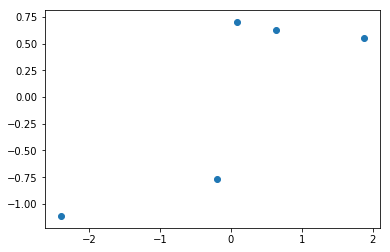

In [4]:
plt.scatter(X[:, 0],X[:, 1])

## An Interactive Plot
Now we'll create an interactive plot with these data.

In [5]:
# bokeh plot

# pre-populate data source object
z0 = np.nan*np.zeros(len(X))
z1 = np.nan*np.zeros(len(X))
x0s = [np.array(np.nan*np.zeros(2)) for i in range(0,len(X))]
x1s = [np.array(np.nan*np.zeros(2)) for i in range(0,len(X))]
d = np.nan*np.zeros(len(X))
dzs = np.zeros(len(X))

# data source
source_data = ColumnDataSource(data=dict(x0=X[:,0], x1=X[:,1], z0=z0, z1=z1, x0s=x0s, x1s=x1s, d=d, dzs=dzs))

# main plot
plot = figure(x_range=(-3, 2.5), y_range=(-2.5, 2.5), plot_width=600, plot_height=600, match_aspect=True)

# plot the new components in the mini-plot on the right
var_plot = figure(x_range=(-3, 3), y_range=(-2.5, 2.5), plot_width = 300, plot_height = 300)
var_plot.scatter('d', 'dzs', source=source_data, color='firebrick', alpha=0.6)

# plot the data
plot.scatter('x0', 'x1', source=source_data, color='navy', alpha=0.6, size=5)

# plot the new axis
plot.line('z0', 'z1', source=source_data, color='black', alpha=0.5)

# plot the projections of the data onto the rotating line
plot.scatter('z0', 'z1', source=source_data, color='firebrick', alpha=0.6)

# plot all the lines connecting the data dots to the projection dots
glyph = MultiLine(xs = "x0s", ys = "x1s", line_color="#8073ac", line_width=1)
plot.add_glyph(source_data, glyph)

# the javascript code that calculates all the projection dots depending upon the user-chosen angle for the line to project onto
callback = CustomJS(args=dict(source=source_data), code="""
    var data = source.data;
    var x0 = data['x0']
    var x1 = data['x1']
    
    var d = data['d']
    
    var z0 = data['z0']
    var z1 = data['z1']
    
    var x0s = data['x0s']
    var x1s = data['x1s']
    
    var A = ang.value*Math.PI/180;

    var w = [Math.cos(A), Math.sin(A)];

    for (var i = 0; i < x0.length; i++) {
        d[i] = x0[i]*w[0] + x1[i]*w[1];
        z0[i] = w[0]*d[i];
        z1[i] = w[1]*d[i];
        x0s[i] = [x0[i], z0[i]];
        x1s[i] = [x1[i], z1[i]];
    }

    data['z0'] = z0
    data['z1'] = z1
    data['x0s'] = x0s
    data['x1s'] = x1s
    data['d'] = d
    
    source.change.emit();
""")

# make the slider bar
ang_slider = Slider(start=0, end=180, value=1, step=.05, title="Angle", callback=callback)
callback.args["ang"] = ang_slider

# add output text
div = Div(text="Instructions: There's a lot of code in the cell above! What just happened? The blue dots are our original data points. We are choosing the direction of the first PC for this dataset; this direction is represented by the black line. The red dots are the projections of the data onto the new basis direction. Using the slider bar, change the angle of the new basis direction, and observe how the projections and the variance of the projections, represented by the spread of the points in the plot on the right, change.", width=900, height=100)

# empty space div
space_div_1 = Div(width=200, height=80)
space_div_2 = Div(width=200, height=95)

# plot layout
lo = layout([
  [[widgetbox(div), plot], [widgetbox(space_div_1), widgetbox(ang_slider), widgetbox(space_div_2), var_plot]],
])

# display
show(lo)

## Quiz
Once you've played around with the interactive plot above, submit the following quiz. Based on what you've learned in the lessons about what PCA does, eyeball the plot above and choose the approximate direction of the first principal component for the above dataset. Submit your answer as an angle in degrees. Here, we are just looking for an approximate value, so we are not looking for a calculation of the correct angle, just an approximation. It will be scored correct if it's right to within ±10°.

In [19]:
import quiz_tests

# Fill in the value of the angle
angle = 26.5

quiz_tests.test_direction_of_first_PC(angle)

Tests Passed
